In [1]:
from neural_style_fn import neural_style
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# The globals 

In [2]:
#bgcol8_Diffuse_Surf_Chain-hooke
content_img = 'C:/Users/guest-developer/metastable_impressions/neural-style/content/tgas/bgcol8_Diffuse_Surf_Chain.tga'


In [3]:
style_img = 'C:/Users/guest-developer/metastable_impressions/neural-style/styles/timeline_images/hooke.jpg'


# The hyperparameters

# Helper functions

In [49]:
def run_hyperparams(content_path, style_path, hyperparams):
    """
    hyperparams: tuple with two values, the name of the hyperparam being tested & its values
    content_path: the path to the content image
    style_path: the path to the style image
    """ 
    
    # set up results dictionary
    results = {'name': hyperparams[0], 'vals': hyperparams[1], 'images': []}
    
    for val in hyperparams[1]:
        #create kwargs dictionary for function
        kwargs = {}
        kwargs[hyperparams[0]] = val
        
        # progress message
        print('testing: ', kwargs)
        
        # run style transfer
        content, style, output = neural_style(content=content_path, styles=[style_path], **kwargs)
        
        # record results
        results['images'].append((content, output, style))
        
        # progress message finish
        print('-------\n')
        
    return results

In [51]:
def plot_results(results_dict):
    num_images = 3 # content, output, style
    num_results = len(results_dict['vals']) # number of hyperparam trials
    axes_height = 4 # in inches
    fig_height = num_results*axes_height
    fig_width = num_images*axes_height
    
    fig, axes = plt.subplots(num_results,num_images,figsize=(fig_width,fig_height))
    for i in range(num_results):
        for j in range(num_images):
            # get image
            img = results_dict['images'][i][j]
            
            # plot image
            axes[i,j].imshow(img.astype('uint8'))
            
            # remove the ticks and their labels
            axes[i,j].tick_params(bottom=False, top=False, left=False, right=False,
                labelbottom=False, labeltop=False, labelleft=False, labelright=False)
        
        # write the value of the hyperparameter on the middle image
        axes[i,num_images//2].set_title('{0} = {1}'.format(results_dict['name'], results_dict['vals'][i]))
        
    plt.tight_layout()
    
    return fig, axes
    

# Testing the effect of the hyperparameters

## Num iterations

testing:  {'iterations': 1000}
Optimization started...
content loss: 1.01328e+06
  style loss: 199272
     tv loss: 40903.8
  total loss: 1.25346e+06
-------

testing:  {'iterations': 1500}
Optimization started...
content loss: 1.04073e+06
  style loss: 200472
     tv loss: 43585.1
  total loss: 1.28479e+06
-------

testing:  {'iterations': 2000}
Optimization started...
content loss: 1.51689e+06
  style loss: 938312
     tv loss: 91134.9
  total loss: 2.54633e+06
-------



(<Figure size 864x864 with 9 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002338038C710>,
       dtype=object))

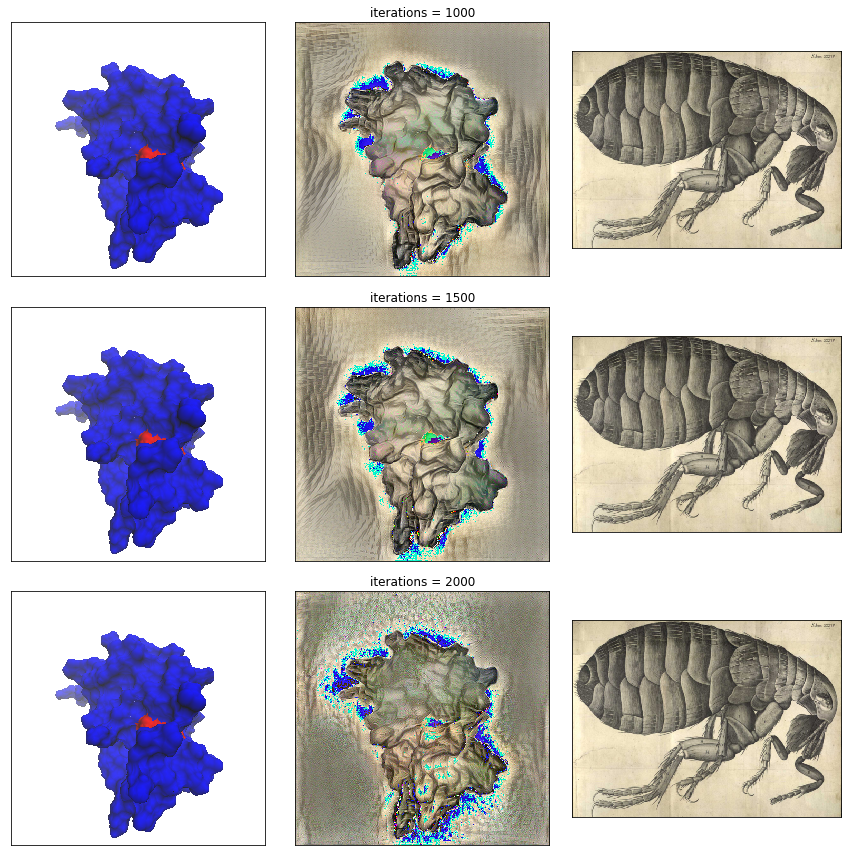

In [55]:
hyperparams = ('iterations', [1000, 1500, 2000])
results = run_hyperparams(content_img, style_img, hyperparams)
plot_results(results)

Not quite sure why there's blue noise (content image?) around the output and why it seems to increase with more iterations. Let's try and run the original function, not from within the `run_hyperparams` function

Optimization started...
content loss: 1.01675e+06
  style loss: 199081
     tv loss: 40847.9
  total loss: 1.25668e+06


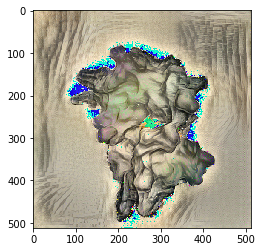

In [57]:
content, style, output = neural_style(content=content_img, styles=[style_img], iterations=1000)
plt.imshow(output.astype('uint8'))